# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [1]:
#import libraries first
import pandas as pd
import numpy as np



In [3]:
#Load datasets
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()



sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace= True)

In [17]:
df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


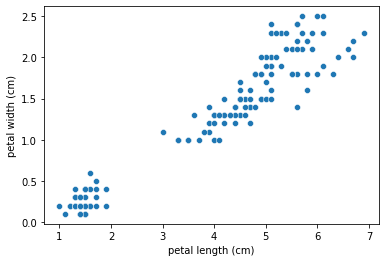

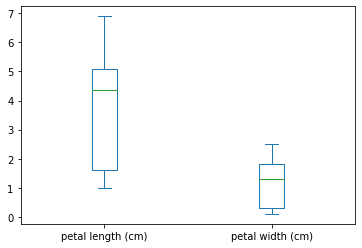

In [13]:
#visualize your data here
import matplotlib.pyplot as plt
import seaborn as sns

x=df['petal length (cm)']
y=df['petal width (cm)']

sns.scatterplot(x,y)
df.plot.box()


## <font color = blue> 3. Train model

In [37]:
#train your model here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df)




KMeans(n_clusters=3, random_state=0)

## <font color = blue> 4. Explore KMeans attributes

In [38]:
#check Kmean algorithm's attribute
kmeans.cluster_centers_



array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [39]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
kmeans.inertia_

31.37135897435897

In [45]:
kmeans.n_features_in_


2

## <font color = blue> 5. Prediction

In [47]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample=[[5.59,2.03]]


In [76]:
y_pred=kmeans.predict(x_sample)

y_pred


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

## <font color = blue> 6. Plotting clusters with thier centroids

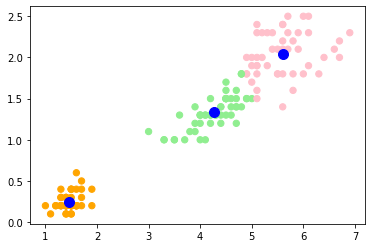

In [62]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
colourmap=np.array(['orange','pink','lightgreen'])
x=df[['petal length (cm)','petal width (cm)']]
category=kmeans.predict(x)
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],s=40, c=colourmap[category])
plt.scatter(1.462     , 0.246 , s =100, c="b")
plt.scatter(5.59583333, 2.0375, s=100,c="b")
plt.scatter(4.26923077, 1.342307691,s =100, c="b")
plt.show()



## <font color = blue> 7. Use elbow method to choose K for Kmean

In [83]:
# plot grah to decide K value for given dataset.
distortions =[]

for i in range(1,4):
  
  KMM = KMeans(n_clusters=i)
  KMM.fit(df)
  distortions.append(KMM.inertia_)





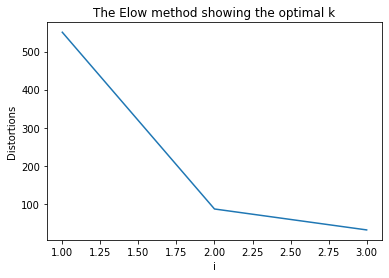

In [89]:
plt.plot(range(1,4),distortions)
plt.xlabel('i')

plt.ylabel("Distortions")
plt.title('The Elow method showing the optimal k')
plt.show()